Credit for notebook https://www.tensorflow.org/tutorials/structured_data/time_series. Portions of this page are modifications based on work created and shared by Google and used according to terms described in the Creative Commons 4.0 Attribution License.

Credit for data https://theoehrly.github.io/Fast-F1/index.html



In [1]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np
import pandas as pd

import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

/Users/nwunder2/.pyenv/versions/3.7.12/envs/f1a-3.7.12/lib/python3.7/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
tel = pd.read_csv('77-lap-630.csv')
tel.head()

,Unnamed: 0,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
0,2,2021-05-20 10:16:12.844,0 days 01:01:12.836000,NaN,694.034722,0 days 00:00:00,10872,259,6,100,False,8,interpolation,0.127728,0.000039,OnTrack,-7658,-6671,500
1,3,2021-05-20 10:16:12.851,0 days 01:01:12.843000,NaN,694.034722,0 days 00:00:00.007000,10647,260,7,100,False,8,car,0.635000,0.000193,OnTrack,-7659,-6666,501
2,4,2021-05-20 10:16:12.939,0 days 01:01:12.931000,NaN,694.034722,0 days 00:00:00.095000,10660,261,7,100,False,8,pos,7.021186,0.002133,OnTrack,-7663,-6603,502
3,5,2021-05-20 10:16:13.091,0 days 01:01:13.083000,22.0,694.034722,0 days 00:00:00.247000,10674,262,7,100,False,8,car,18.101667,0.005499,OnTrack,-7669,-6493,502
4,6,2021-05-20 10:16:13.159,0 days 01:01:13.151000,22.0,691.268056,0 days 00:00:00.315000,10732,263,7,100,False,8,pos,23.085760,0.007013,OnTrack,-7672,-6444,503


In [8]:
# Credit: https://theoehrly.github.io/Fast-F1/examples_gallery/plot_gear_shifts_on_track.html#sphx-glr-examples-gallery-plot-gear-shifts-on-track-py
def plot_gear_on_lap(tel):
  x = np.array(tel['X'].values)
  y = np.array(tel['Y'].values)
  points = np.array([x, y]).T.reshape(-1, 1, 2)
  segments = np.concatenate([points[:-1], points[1:]], axis=1)
  gear = tel['nGear'].to_numpy().astype(float)

  cmap = cm.get_cmap('Paired')
  lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
  lc_comp.set_array(gear)
  lc_comp.set_linewidth(4)

  plt.gca().add_collection(lc_comp)
  plt.axis('equal')
  plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

  title = plt.suptitle("Lap from FP1\n 77 - Monaco Grand Prix 2021")

  cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))
  cbar.set_ticks(np.arange(1.5, 9.5))
  cbar.set_ticklabels(np.arange(1, 9))

  plt.show()

Here is an example lap that shows the track layout and the gear the car was in as it moved through the circuit.

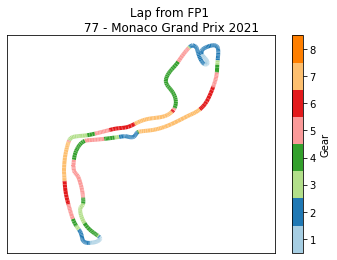

In [9]:
plot_gear_on_lap(tel)

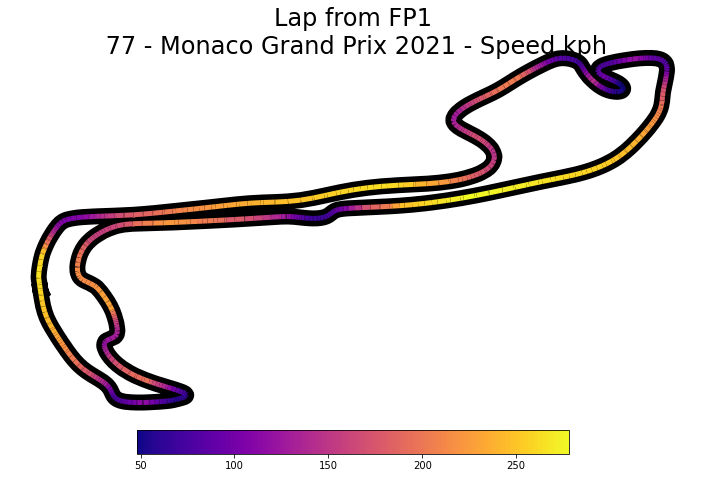

In [4]:
# Get telemetry data
x = tel['X']              # values for x-axis
y = tel['Y']              # values for y-axis
color = tel['Speed']      # value to base color gradient on
colormap = mpl.cm.plasma

# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle(f'Lap from FP1\n 77 - Monaco Grand Prix 2021 - Speed kph', size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(tel['X'], tel['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")


# Show the plot
plt.show()

Here is a plot from the same lap showing speed through the circuit.

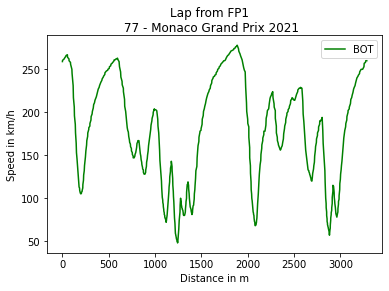

In [11]:
fig, ax = plt.subplots()
ax.plot(tel['Distance'], tel['Speed'], color='green', label='BOT')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle("Lap from FP1\n 77 - Monaco Grand Prix 2021")

plt.show()

Next we will load an entire stint (a set of laps drivin on the same set of tires).

In [12]:
df = pd.read_csv('77-stint-hard-clean.csv')
df.head()

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
0,2021-05-20 10:14:57.116,0 days 00:59:57.108000,NaN,483.667222,0 days 00:00:00,10791,259,6,100,False,8,interpolation,0.289905,0.000088,OnTrack,-7658,-6663,501
1,2021-05-20 10:14:57.132,0 days 00:59:57.124000,NaN,483.667222,0 days 00:00:00.016000,10588,260,7,100,False,8,car,1.448889,0.000441,OnTrack,-7659,-6652,501
2,2021-05-20 10:14:57.278,0 days 00:59:57.270000,NaN,483.667222,0 days 00:00:00.162000,10628,261,7,100,False,8,pos,12.047177,0.003667,OnTrack,-7666,-6547,502
3,2021-05-20 10:14:57.371,0 days 00:59:57.363000,31.0,483.667222,0 days 00:00:00.255000,10668,262,7,100,False,8,car,18.842778,0.005735,OnTrack,-7669,-6479,502
4,2021-05-20 10:14:57.498,0 days 00:59:57.490000,31.0,483.300556,0 days 00:00:00.382000,10685,263,7,100,False,8,pos,28.201140,0.008583,OnTrack,-7675,-6387,503


In [13]:
len(df)

2776

Identify (and eventually drop) categorical columns. While it would be interesting to build a model that accounts for these factors the preliminaly model will only look at linear values.

In [14]:
categorical_columns = [
  'DriverAhead',
  'nGear',
  'Brake',
  'DRS',
  'Source',
  'Status'
]
for column in categorical_columns:
  df[column] = df[column].astype('category')  
  
drop_columns = [
  'SessionTime',
  'DistanceToDriverAhead',
  'Time',
  # 'Distance',
  'RelativeDistance',
  'X',
  'Y',
  'Z'
]
for column in np.concatenate((drop_columns, categorical_columns)):
  df = df.drop(column, axis=1)

columns_to_keep = ['RPM', 'Speed', 'Throttle', 'Distance']

Clean NaN values, but there are none.

In [15]:
nan_columns = df.columns[df.isna().any()].tolist()
print(nan_columns)

[]


Convert the Date column to timestamps

In [16]:
dates = pd.to_datetime(df.pop('Date'))
timestamps = dates.map(pd.Timestamp.timestamp)

We are left with the following simplified telemetry data for the free practice stint.

In [17]:
df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
RPM,2776.0,9257.897334,2108.565989,3833.000000,7553.250000,9576.500000,11175.500000,12749.000000
Speed,2776.0,149.198127,65.606089,38.000000,89.000000,144.000000,204.000000,279.000000
Throttle,2776.0,47.844380,44.164830,0.000000,0.000000,43.000000,100.000000,100.000000
Distance,2776.0,1665.650155,914.756658,0.047209,979.730403,1490.002668,2507.867037,3285.160502


This plot shows RPM, Spee, and Throttle for the entire free practice stint across time. The entire stint represents several laps.

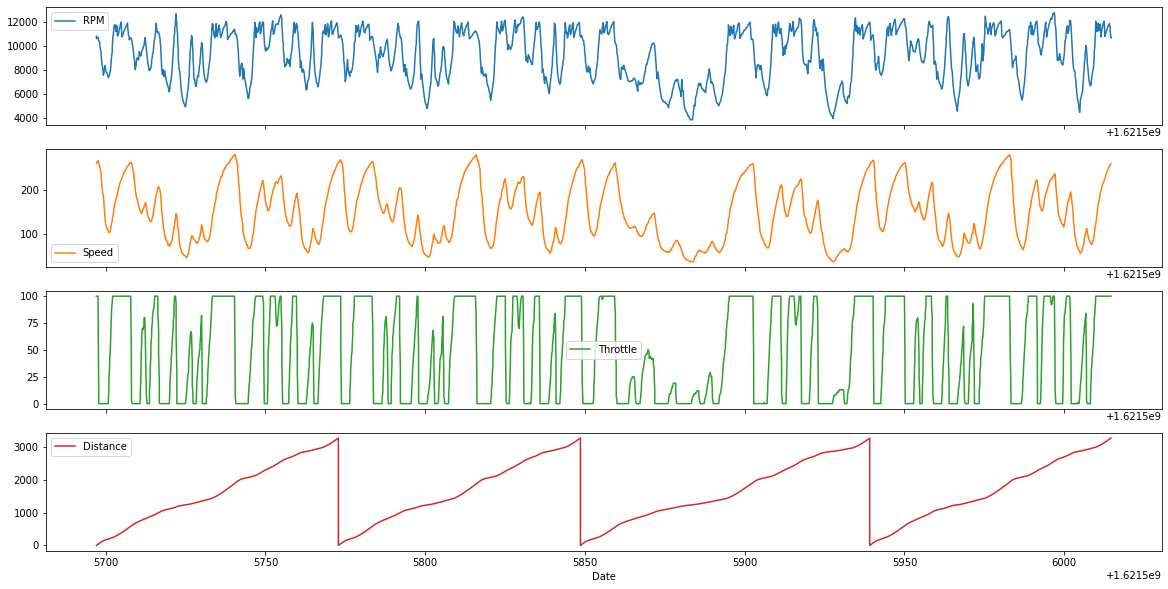

In [18]:
plot_cols = columns_to_keep
plot_features = df[plot_cols]
plot_features.index = timestamps
_ = plot_features.plot(subplots=True, figsize=(20,10))

## Preliminary Tensorflow Model

Since we do not know if these data are well suited for machine learning predictions, let's first look at the preformance of existing neural network models.

Credit: The following was adapted from https://www.tensorflow.org/tutorials/structured_data/time_series

Build the training, validation, and test datasets.

In [19]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)] # 70% of the dataset
val_df = df[int(n*0.7):int(n*0.9)] # 20% of the dataset
test_df = df[int(n*0.9):] # 10% of the dataset

num_features = df.shape[1]

Normalize these data

In [20]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

[Text(0, 0, 'RPM'),
 Text(1, 0, 'Speed'),
 Text(2, 0, 'Throttle'),
 Text(3, 0, 'Distance')]

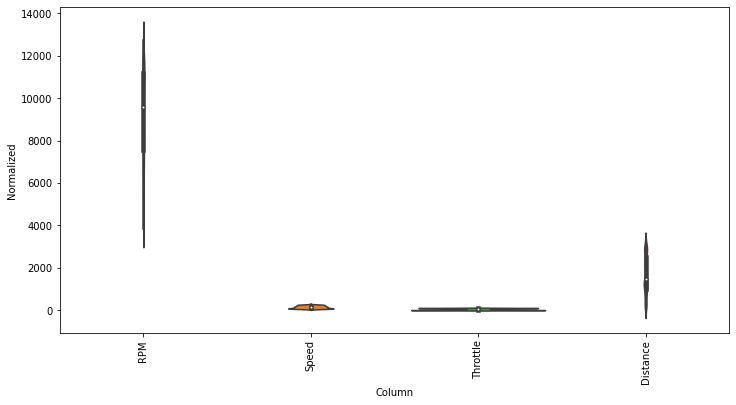

In [21]:
df_r = df.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_r)
ax.set_xticklabels(df.keys(), rotation=90)

[Text(0, 0, 'RPM'),
 Text(1, 0, 'Speed'),
 Text(2, 0, 'Throttle'),
 Text(3, 0, 'Distance')]

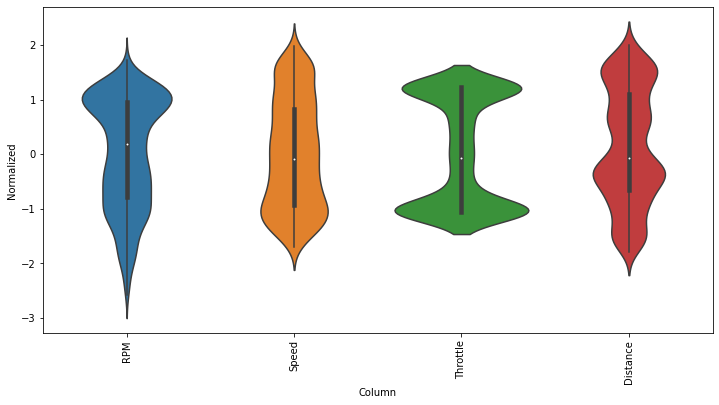

In [22]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
ax.set_xticklabels(df.keys(), rotation=90)

### Data Windowing

The data window generates a series of input values and a given label for those inputs drawn from the overall dataset.

Again adaped from and credit to https://www.tensorflow.org/tutorials/structured_data/time_series 

In [23]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

This window is 24 values with a label 24 indicies from the last value in the input window.

In [24]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['Speed'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['Speed']

This example is a smaller window of 6 input values with the label set at the next index immediately following the last value in the input window.

In [25]:
w2 = WindowGenerator(input_width=24, label_width=1, shift=1,
                     label_columns=['Speed'])
w2

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24]
Label column name(s): ['Speed']

We can adjust the label width and shift to generate a window with a label of more values, but we will use w2 above for training.

In [26]:
WindowGenerator(input_width=6, label_width=2, shift=2,
                     label_columns=['Speed'])

Total window size: 8
Input indices: [0 1 2 3 4 5]
Label indices: [6 7]
Label column name(s): ['Speed']

In [27]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [28]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 25, 4)
Inputs shape: (3, 24, 4)
Labels shape: (3, 1, 1)


2022-05-13 17:07:34.145759: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [29]:
w2.example = example_inputs, example_labels

In [30]:
def plot(self, model=None, plot_col='Speed', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

Here is a visulaization of the window generator defined above. Blue are the model input and green is the label target.

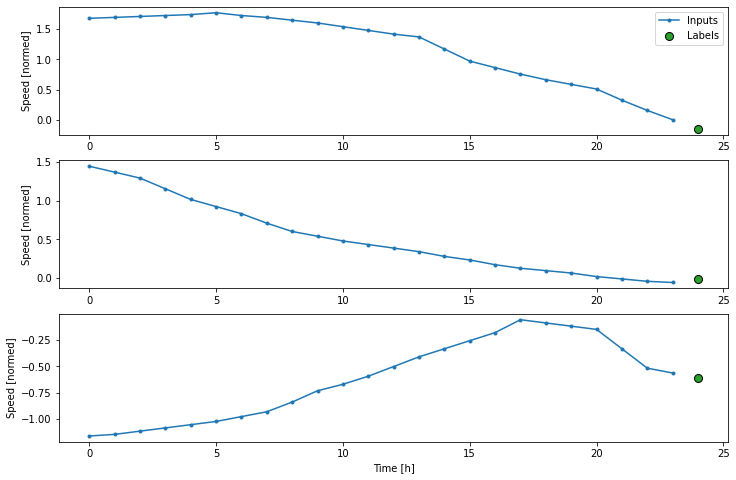

In [31]:
w2.plot()

In [32]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [33]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [34]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 24, 4), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [35]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 4)
Labels shape (batch, time, features): (32, 1, 1)


In [36]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['Speed'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Speed']

In [37]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 4)
Labels shape (batch, time, features): (32, 1, 1)


In [38]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [39]:
baseline = Baseline(label_index=column_indices['Speed'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

18/18 [==============================] - 0s 881us/step - loss: 0.0040 - mean_absolute_error: 0.0484


In [40]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['Speed'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['Speed']

In [41]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 4)
Output shape: (32, 24, 1)


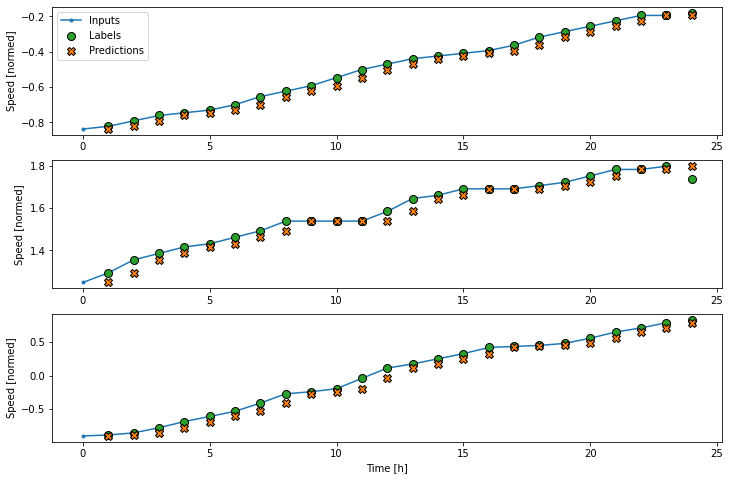

In [42]:
wide_window.plot(baseline)

In [43]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Input shape: (32, 1, 4)
Output shape: (32, 1, 1)
Epoch 1/20
61/61 [==============================] - 1s 5ms/step - loss: 2.1896 - mean_absolute_error: 1.2949 - val_loss: 2.5880 - val_mean_absolute_error: 1.3958
Epoch 2/20
61/61 [==============================] - 0s 2ms/step - loss: 1.7600 - mean_absolute_error: 1.1610 - val_loss: 2.0526 - val_mean_absolute_error: 1.2466
Epoch 3/20
61/61 [==============================] - 0s 3ms/step - loss: 1.4008 - mean_absolute_error: 1.0357 - val_loss: 1.6068 - val_mean_absolute_error: 1.1074
Epoch 4/20
61/61 [==============================] - 0s 2ms/step - loss: 1.1044 - mean_absolute_error: 0.9195 - val_loss: 1.2481 - val_mean_absolute_error: 0.9809
Epoch 5/20
61/61 [==============================] - 0s 2ms/step - loss: 0.8646 - mean_absolute_error: 0.8132 - val_loss: 0.9535 - val_mean_absolute_error: 0.8625
Epoch 6/20
61/61 [==============================] - 0s 2ms/step - loss: 0.6722 - mean_absolute_error: 0.7168 - val_loss: 0.7256 - val_mean_ab

Input shape: (32, 24, 4)
Output shape: (32, 24, 1)


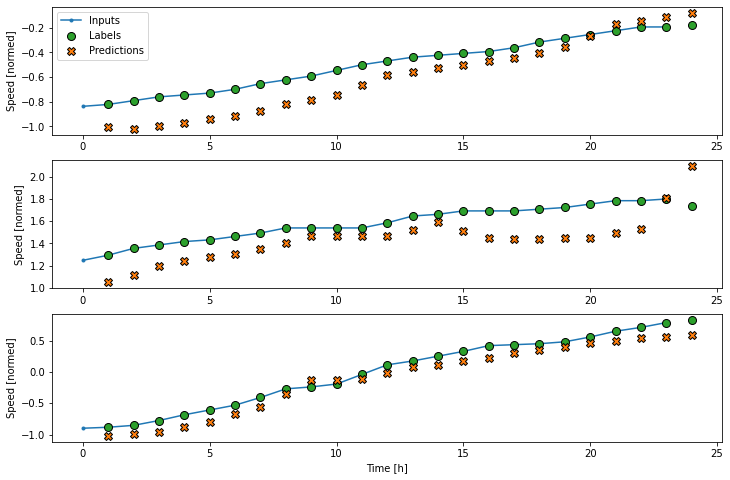

In [44]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)
wide_window.plot(linear)

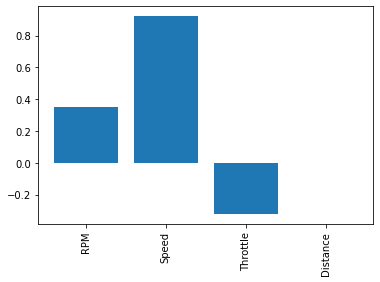

In [45]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

# Dense

Epoch 1/20
61/61 [==============================] - 1s 4ms/step - loss: 0.1731 - mean_absolute_error: 0.2911 - val_loss: 0.0204 - val_mean_absolute_error: 0.1050
Epoch 2/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0076 - mean_absolute_error: 0.0642 - val_loss: 0.0058 - val_mean_absolute_error: 0.0568
Epoch 3/20
61/61 [==============================] - 0s 2ms/step - loss: 0.0031 - mean_absolute_error: 0.0413 - val_loss: 0.0030 - val_mean_absolute_error: 0.0420
Epoch 4/20
61/61 [==============================] - 0s 2ms/step - loss: 0.0021 - mean_absolute_error: 0.0341 - val_loss: 0.0023 - val_mean_absolute_error: 0.0358
Epoch 5/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0017 - mean_absolute_error: 0.0305 - val_loss: 0.0019 - val_mean_absolute_error: 0.0324
Epoch 6/20
61/61 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_absolute_error: 0.0277 - val_loss: 0.0017 - val_mean_absolute_error: 0.0304
Epoch 7/20
61/61 [==========

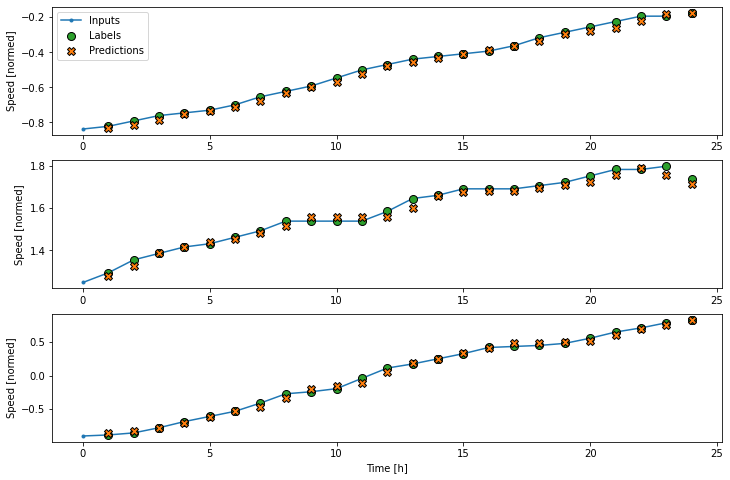

In [46]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

wide_window.plot(dense)

Text(0.5, 1.0, 'Given 3 samples of inputs, predict next value into the future.')

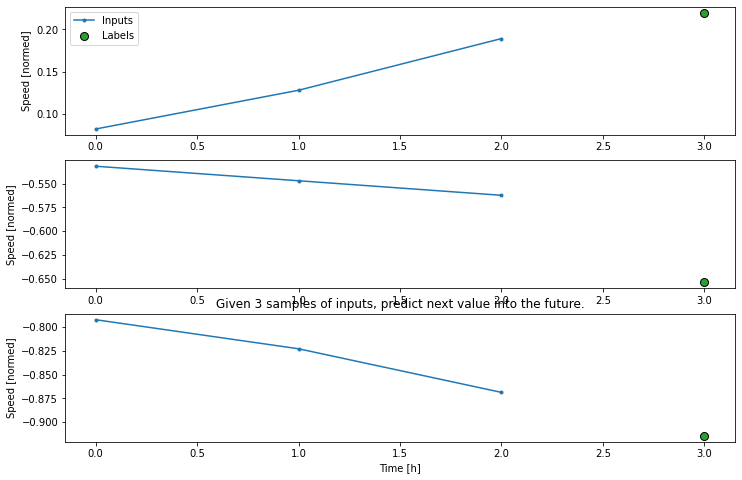

In [47]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['Speed'])

conv_window

conv_window.plot()
plt.title("Given 3 samples of inputs, predict next value into the future.")

# CNN

18/18 [==============================] - 0s 987us/step - loss: 0.0030 - mean_absolute_error: 0.0407
Wide window
Input shape: (32, 24, 4)
Labels shape: (32, 24, 1)
Output shape: (32, 22, 1)
Wide conv window
Input shape: (32, 26, 4)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


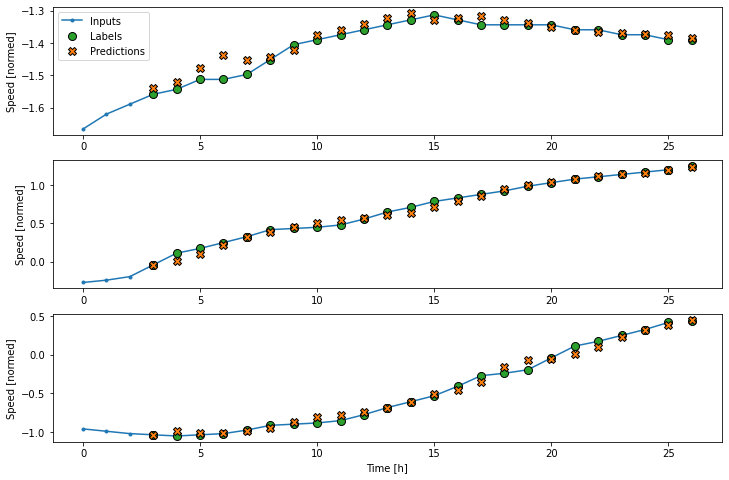

In [48]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['Speed'])

wide_conv_window

print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

wide_conv_window.plot(conv_model)

# RNN

17/17 [==============================] - 0s 2ms/step - loss: 0.0034 - mean_absolute_error: 0.0374


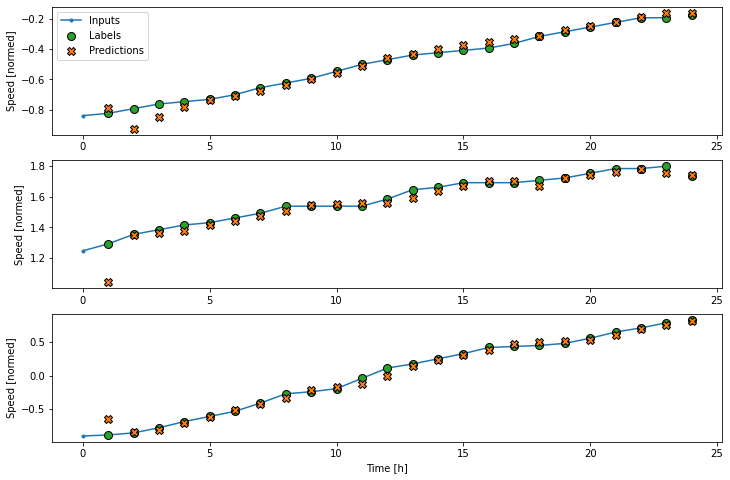

In [49]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

wide_window.plot(lstm_model)

# Performance

Baseline    : 0.0627
Linear      : 0.2241
Dense       : 0.0281
Conv        : 0.0456
LSTM        : 0.0329


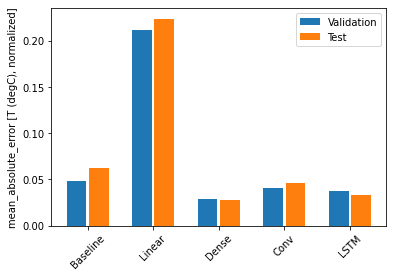

In [50]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [T (degC), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

# Multi Output models

In [51]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 4)
Labels shape (batch, time, features): (32, 24, 4)


### Baseline

In [52]:
baseline = Baseline()
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

17/17 [==============================] - 0s 824us/step - loss: 0.0206 - mean_absolute_error: 0.0602


### Dense

18/18 [==============================] - 0s 926us/step - loss: 0.0188 - mean_absolute_error: 0.0757


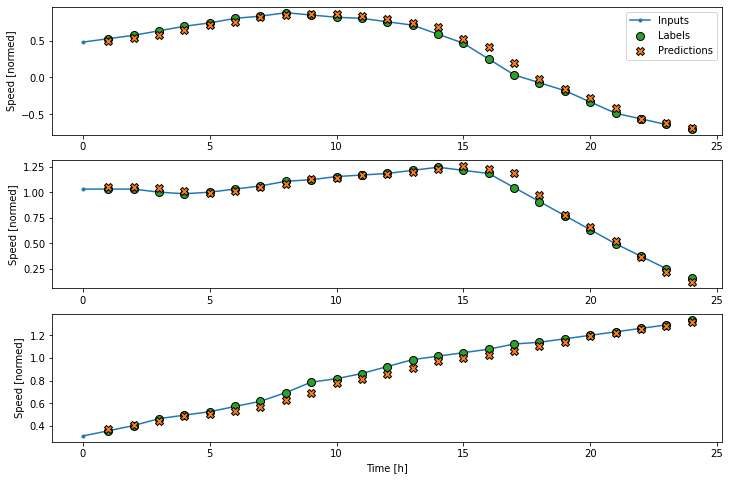

In [53]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)
wide_window.plot(dense)

### RNN

In [54]:
%%time
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

17/17 [==============================] - 0s 2ms/step - loss: 0.0209 - mean_absolute_error: 0.0761

CPU times: user 24.2 s, sys: 5.66 s, total: 29.9 s
Wall time: 12.5 s


### LSTM

In [55]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each time step is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small.
        # Therefore, initialize the output layer with zeros.
        kernel_initializer=tf.initializers.zeros())
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

17/17 [==============================] - 0s 2ms/step - loss: 0.0140 - mean_absolute_error: 0.0545



### Performance

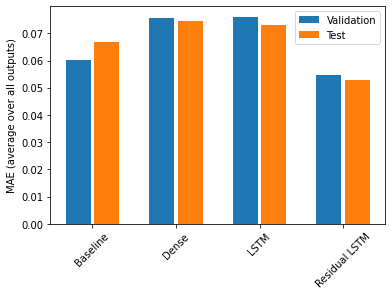

In [56]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

# Multi Step models

Total window size: 128
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
Label indices: [ 64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127]
Label column name(s): None

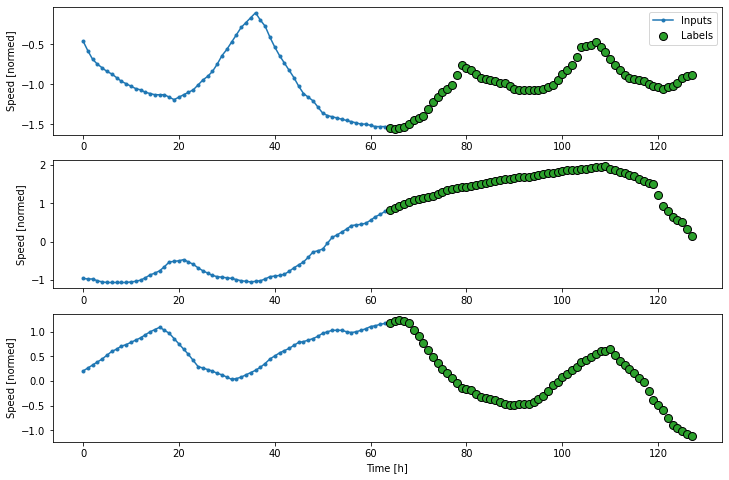

In [59]:
OUT_STEPS = 64
multi_window = WindowGenerator(input_width=64,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

### Baseline

14/14 [==============================] - 0s 989us/step - loss: 1.4355 - mean_absolute_error: 0.8338


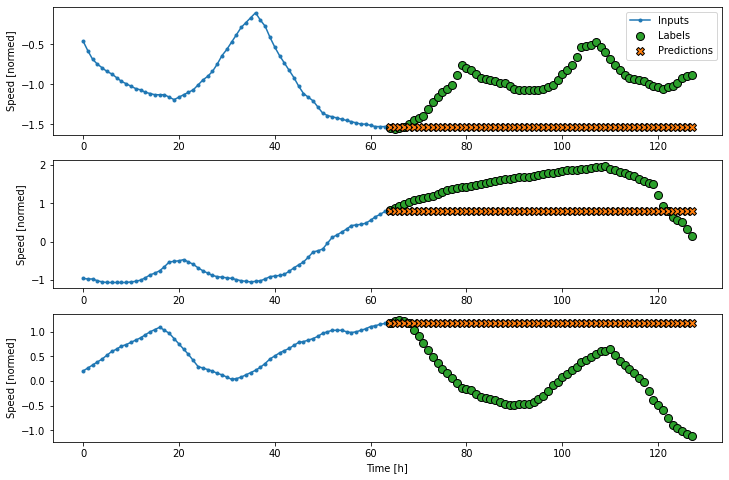

In [60]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

14/14 [==============================] - 0s 893us/step - loss: 2.2227 - mean_absolute_error: 1.1511


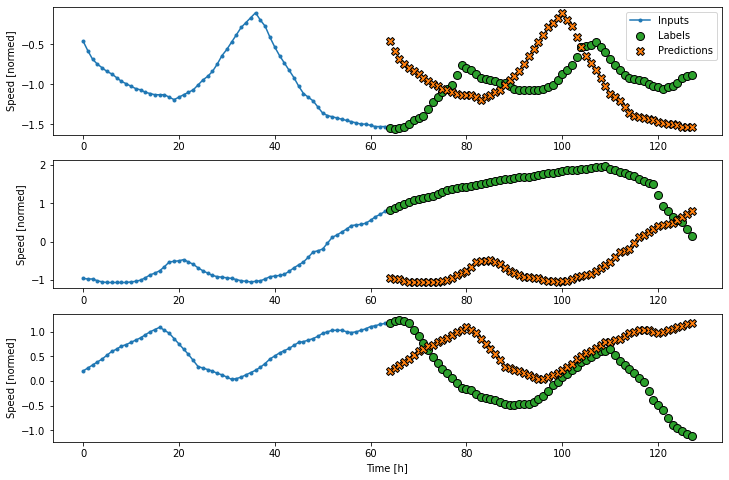

In [61]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

### Linear

14/14 [==============================] - 0s 871us/step - loss: 0.7752 - mean_absolute_error: 0.6962


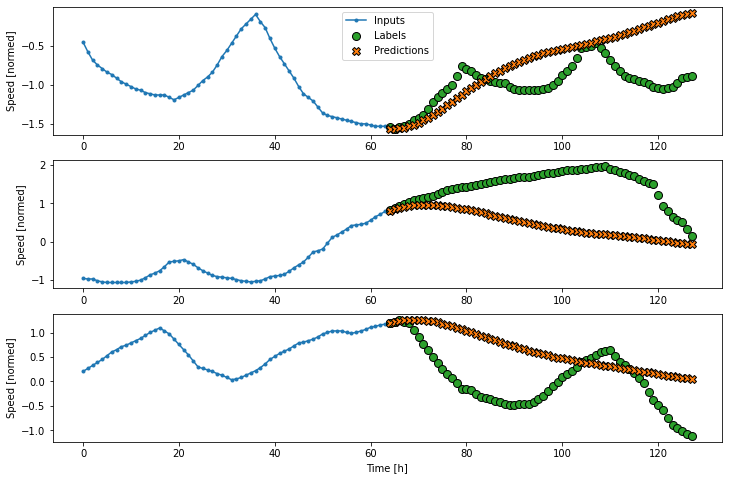

In [62]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

### Dense

14/14 [==============================] - 0s 1ms/step - loss: 0.5088 - mean_absolute_error: 0.5229


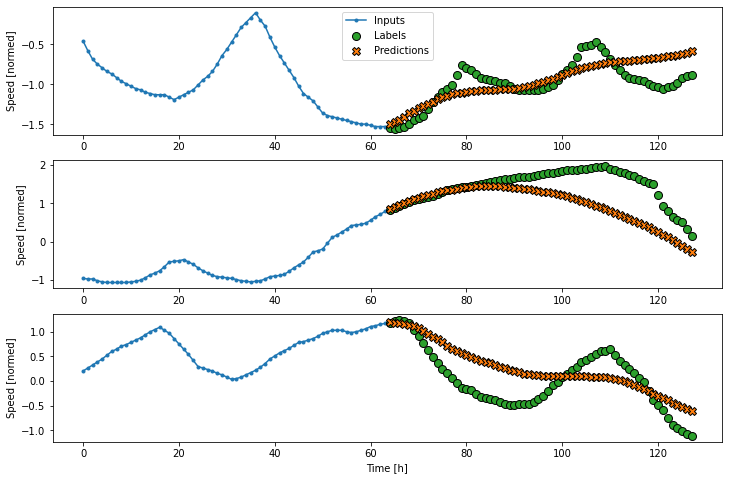

In [63]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

### CNN

14/14 [==============================] - 0s 1ms/step - loss: 0.5163 - mean_absolute_error: 0.5283


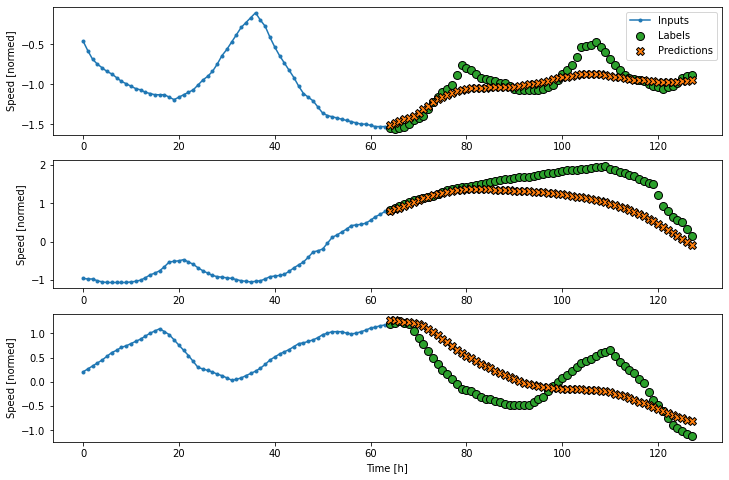

In [64]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

### RNN

14/14 [==============================] - 0s 4ms/step - loss: 0.3858 - mean_absolute_error: 0.4139


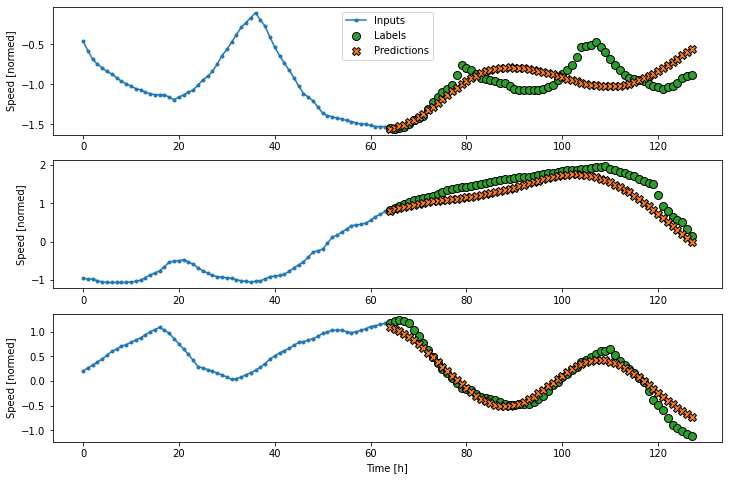

In [65]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

# Advanced: Autoregressive model

Output shape (batch, time, features):  (32, 64, 4)
Epoch 1/20
57/57 [==============================] - 10s 43ms/step - loss: 0.8172 - mean_absolute_error: 0.7681 - val_loss: 0.8046 - val_mean_absolute_error: 0.7364
Epoch 2/20
57/57 [==============================] - 1s 24ms/step - loss: 0.6340 - mean_absolute_error: 0.6523 - val_loss: 0.7523 - val_mean_absolute_error: 0.7025
Epoch 3/20
57/57 [==============================] - 1s 23ms/step - loss: 0.5773 - mean_absolute_error: 0.6112 - val_loss: 0.7015 - val_mean_absolute_error: 0.6658
Epoch 4/20
57/57 [==============================] - 1s 23ms/step - loss: 0.5343 - mean_absolute_error: 0.5797 - val_loss: 0.6568 - val_mean_absolute_error: 0.6325
Epoch 5/20
57/57 [==============================] - 1s 23ms/step - loss: 0.4944 - mean_absolute_error: 0.5425 - val_loss: 0.6436 - val_mean_absolute_error: 0.6077
Epoch 6/20
57/57 [==============================] - 1s 23ms/step - loss: 0.4422 - mean_absolute_error: 0.4975 - val_loss: 0.6171 - va

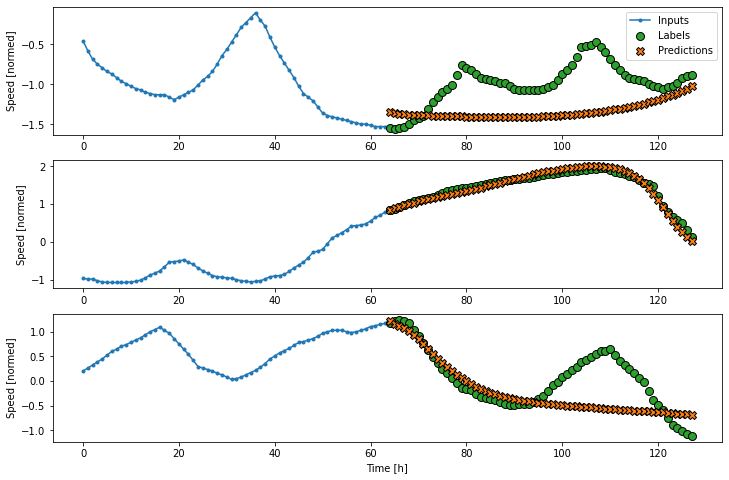

In [66]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

history = compile_and_fit(feedback_model, multi_window)

# IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)